In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import noise
import streaking_calculation as sc

In [2]:
def plot_spectogram(x_axis,
                    y_axis,
                    spect,
                    x_label='NIR-XUV delay [fs]',
                    y_label='kinetic energy [eV]',
                    cbar_label='electron yield (arb.)',
                    figsize=(6.5, 5),
                    dpi=200,
                    version='pcolormesh',
                    **kwargs):
    """
    This function takes in a single streaking spectrogram and generates a pcolormesh-plot.
    
    :param x_axis: NIR-XUV delay axis [fs]
    :param y_axis: Energy axis [eV]
    :param spect: The spectogram
    :param x_label: Label for x-axis
    :param y_label: Label for y-axis
    :param cbar_label: Label for Colorbar
    :param figsize: Figure Size
    :param dpi: DPI
    :param kwargs: Other possible settings for the plot
    """
    fig,ax=plt.subplots(1, figsize=figsize, dpi=dpi)
    plot_kwargs={'shading':'nearest', **kwargs}

    if version=='pcolormesh':
        mappable=ax.pcolormesh(x_axis, y_axis, spect, **plot_kwargs)
    elif version=='tricontourf':
        FX, FY=np.meshgrid(x_axis, y_axis)
        mappable=ax.tricontourf(FX.flatten(), FY.flatten(), np.abs(spect).flatten(), **plot_kwargs)
    else:
        raise Exception('Choose between pcolormesh or tricontourf.')
    
    cbar_ax = fig.add_axes([0.91, 0.11, 0.01, 0.77])
    cbar=fig.colorbar(mappable, cax=cbar_ax, ticks=[0, .5, 1])
    cbar.set_label(label='$\mathrm{electron}$ $\mathrm{yield}$ $[\mathrm{arb.}]$', fontsize=10)

    fig.subplots_adjust(right=0.9, wspace=0.2, hspace=0.1)

    ax.set_xlabel(x_label, fontsize=10)
    ax.set_ylabel(y_label, fontsize=10)

    return fig

In [3]:
xuv_pulse = 105 # [eV]

in_binding_energies = [6.7, 65]
in_time_delays      = [0, 48e-18]
in_amplitudes       = [1, 0.9]
in_spectral_widths  = [3.87, 3.87]
in_chirps           = [2.86, 18.8]

E_axis, tau_axis, spectogram = sc.create_spectogram(xuv_pulse,
                                                    in_binding_energies,
                                                    in_time_delays,
                                                    in_amplitudes,
                                                    in_spectral_widths,
                                                    in_chirps,
                                                    x_axis=np.linspace(-4, 4, 40),
                                                    y_axis=np.linspace(30, 120, 800))

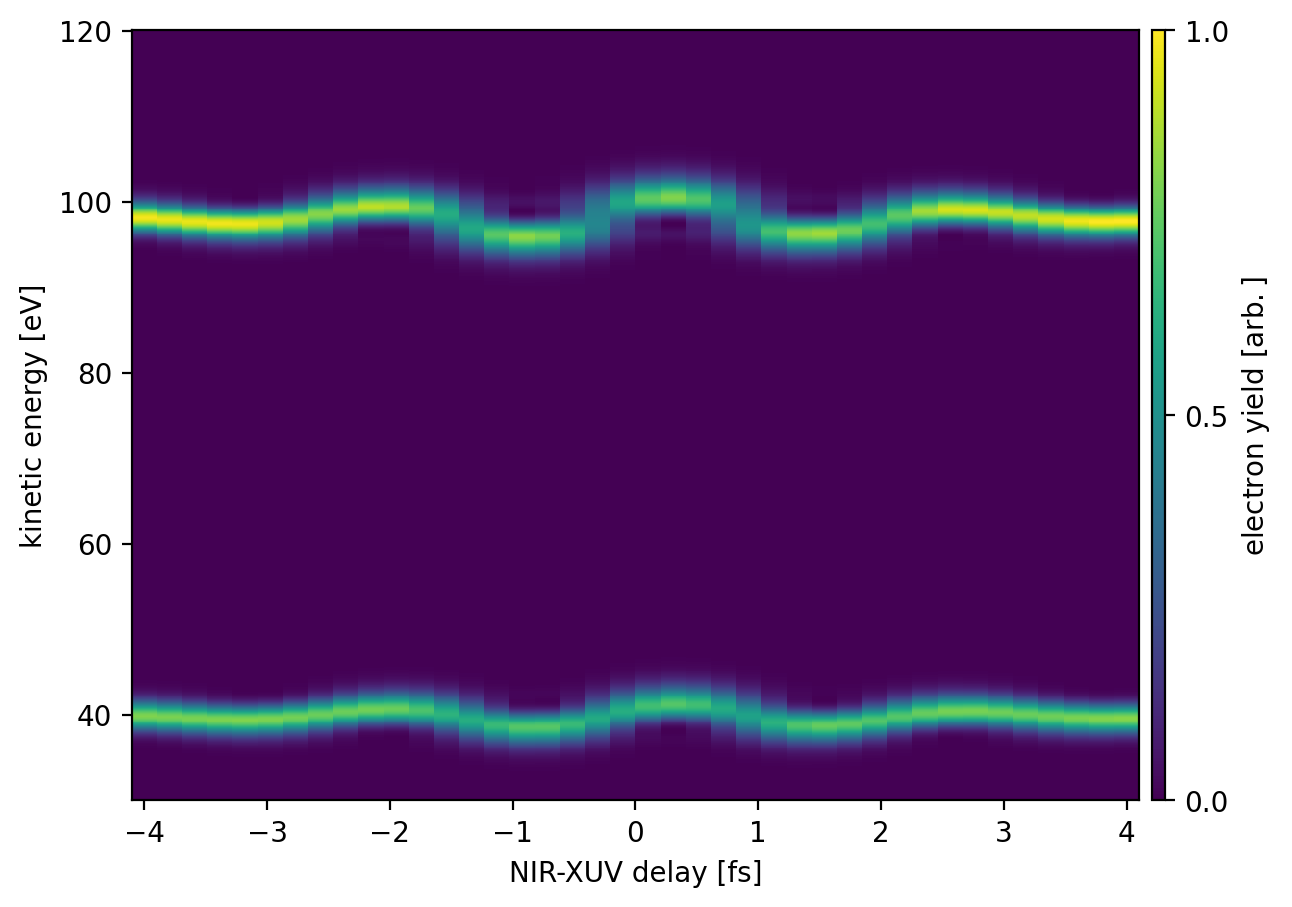

In [4]:
fig = plot_spectogram(tau_axis, E_axis, spectogram.T)

In [5]:
noise_spectrogram = noise.as_deep_learning(tau_axis, E_axis, spectogram, 4)

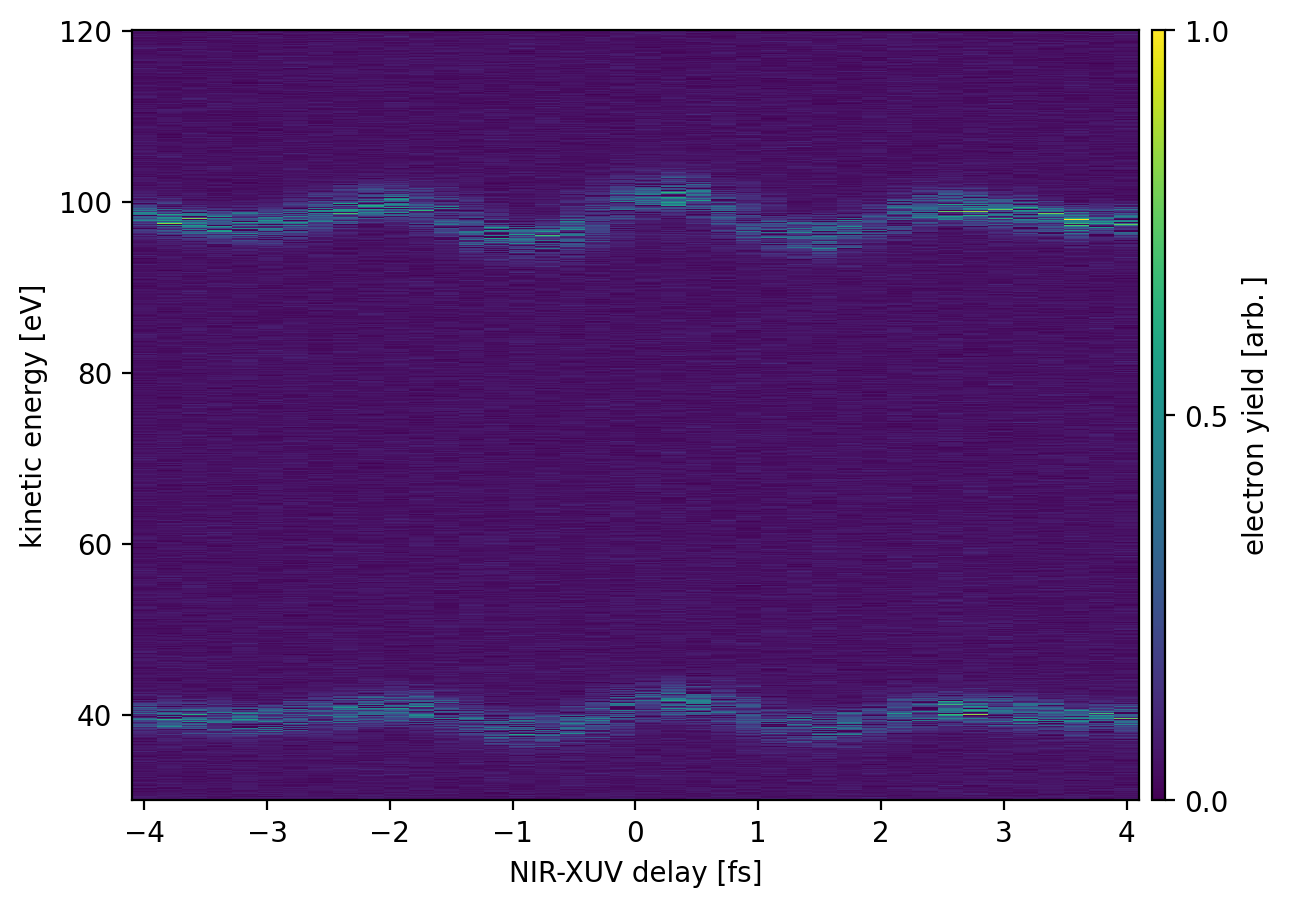

In [6]:
fig = plot_spectogram(tau_axis, E_axis, noise_spectrogram.T)